In [72]:
import sys
import os

project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.visualization import visualization

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

METRICAS_RELEVANTES = ["weight", "fatRate", "muscleRate"]
COLORES = ["#30343F", "#89023E", "#EA638C"]

In [74]:
df = pd.read_csv("input/BODY.csv")

df["time"] = df["time"].str.replace("+0000", "")
df["time"] = pd.to_datetime(df["time"])
df["week"] = df["time"].dt.isocalendar().week
df["nombre_dia"] = df["time"].dt.day_name("es_MX")

In [75]:
FECHA_INICIAL = pd.to_datetime("01-10-2023", dayfirst=True)
FECHA_FINAL = pd.to_datetime("31-10-2023", dayfirst=True)

df_fecha = df[(df.time >= FECHA_INICIAL) & (df.time <= FECHA_FINAL)]

In [76]:
promedios_por_semana = df_fecha.groupby("week")[METRICAS_RELEVANTES].mean()
promedios_por_semana.columns = promedios_por_semana.columns + "_promedios"

pesos_con_promedios = df_fecha.merge(
    promedios_por_semana, how="inner", left_on="week", right_index=True
).set_index("time")

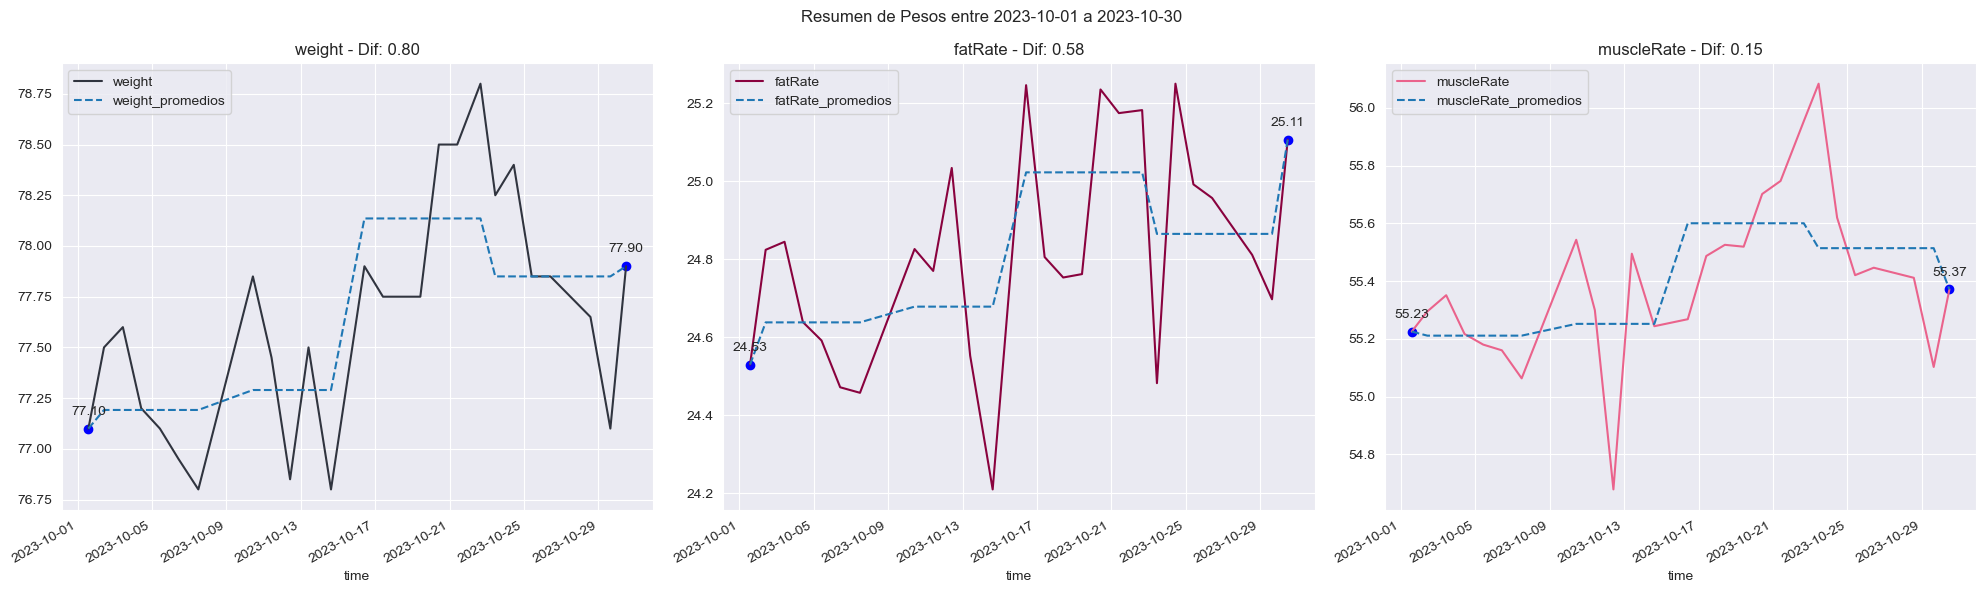

> El resumen de las metricas entre la ultima y primera semana del mes fueron:

|                      |      39 |      44 |   Diferencia |
|:---------------------|--------:|--------:|-------------:|
| weight_promedios     | 77.1    | 77.9    |     0.8      |
| fatRate_promedios    | 24.5298 | 25.1072 |     0.577358 |
| muscleRate_promedios | 55.2251 | 55.3711 |     0.146058 |


In [77]:
figura = visualization.crear_graficos_pesos(pesos_con_promedios, METRICAS_RELEVANTES, COLORES)
resumen = visualization.obtener_resumen_mes_por_semana(promedios_por_semana)
print(f"> El resumen de las metricas entre la ultima y primera semana del mes fueron:\n\n"
      f"{resumen.to_markdown()}")

In [ ]:
figura.savefig("reporte.pdf")